### 2.1 Write a program to generate the state 1/√2 * (|01⟩+|10⟩)

In [35]:
from qiskit import *
%matplotlib inline

In [36]:
qc = QuantumCircuit(2, 2)

In [37]:
qc.h(1);

In [38]:
qc.cx(0, 1);

In [39]:
qc.cx(1, 0);

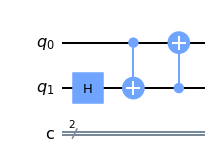

In [40]:
qc.draw(output = "mpl")

In [41]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(1, 4)
state = state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

### 2.2 Generate The Density Matrix for the above state

In [42]:
from qiskit.quantum_info import *

In [43]:
rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

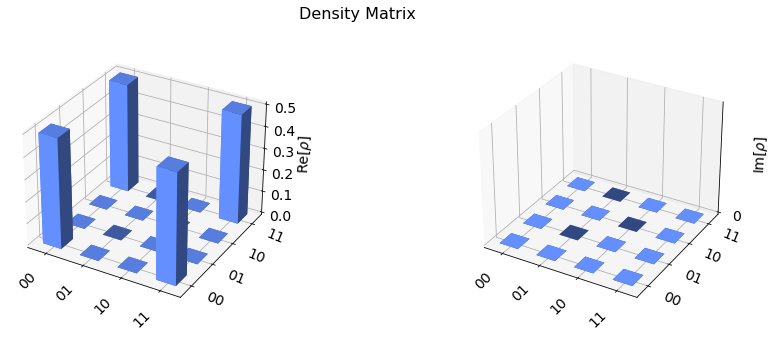

In [44]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

### 2.3 Partial Trace

In [23]:
print(rho_AB.data)



[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [45]:
PT = partial_trace(rho_AB,[0])

print (PT.data)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


### 2.4 Decomposition of Swap Gate into CNOT gate

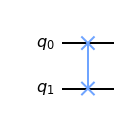

In [46]:
qc_new = QuantumCircuit(2)
qc_new.swap(0,1)
qc_new.draw(output = "mpl")

In [47]:
rho_AB = DensityMatrix.from_instruction(qc_new)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')


<IPython.core.display.Latex object>

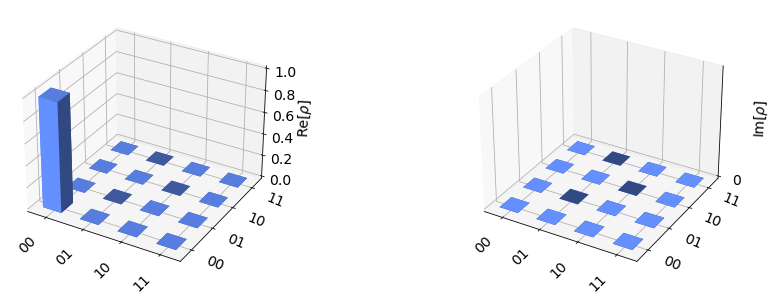

In [48]:
Statevector(qc_new).draw('city')

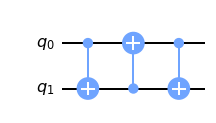

In [49]:
qc_c = QuantumCircuit(2)

qc_c.cx(0,1)
qc_c.cx(1,0)
qc_c.cx(0,1)
qc_c.draw(output = "mpl")

In [50]:
rho_AB = DensityMatrix.from_instruction(qc_c)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

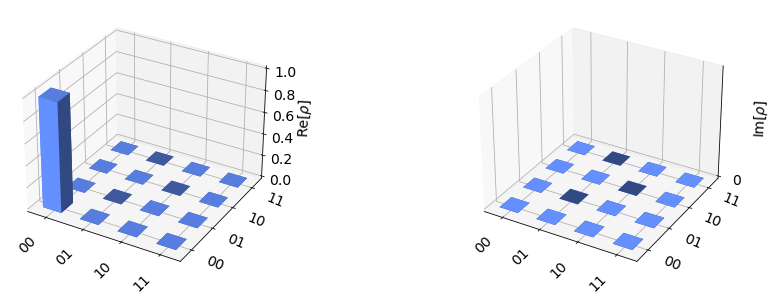

In [34]:
Statevector(qc_c).draw('city')

### 2.5

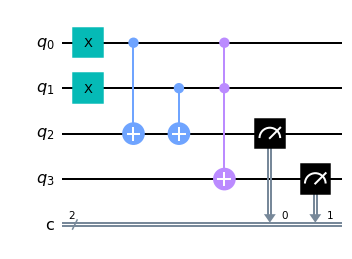

In [51]:
new_qc = QuantumCircuit(4,2)
new_qc.x(0)
new_qc.x(1)

new_qc.cx(0,2)
new_qc.cx(1,2)

new_qc.ccx(0,1,3)

new_qc.measure(2,0)
new_qc.measure(3,1)

new_qc.draw(output='mpl')

{'10': 1024}


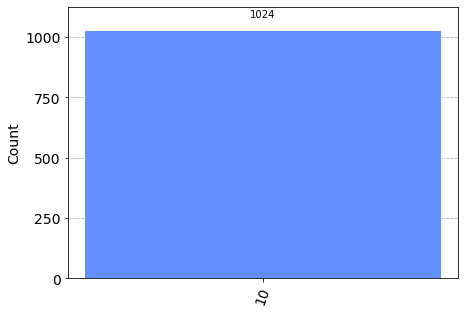

In [52]:
from qiskit.visualization import plot_histogram
sim = Aer.get_backend('aer_simulator')
result = execute(new_qc, backend = sim, shots = 1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)